In [4]:
import numpy as np 
import pickle
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Age,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Polyphagia,Visual Blurring,Obesity,Smoker,High Cholestrol (HDL),Diabetes Outcome
0,6,50,148,72,35,0,33.6,0.627,No,No,Yes,1,1,1
1,1,31,85,66,29,0,26.6,0.351,No,Yes,No,1,0,0
2,8,32,183,64,0,0,23.3,0.672,Yes,No,No,0,1,1
3,1,21,89,66,23,94,28.1,0.167,Yes,No,No,0,0,0
4,0,33,137,40,35,168,43.1,2.288,Yes,Yes,Yes,0,1,1


In [5]:
df = df.rename(columns={'Diabetes Outcome':'DO'})
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Age,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Polyphagia,Visual Blurring,Obesity,Smoker,High Cholestrol (HDL),DO
0,6,50,148,72,35,0,33.6,0.627,No,No,Yes,1,1,1
1,1,31,85,66,29,0,26.6,0.351,No,Yes,No,1,0,0
2,8,32,183,64,0,0,23.3,0.672,Yes,No,No,0,1,1
3,1,21,89,66,23,94,28.1,0.167,Yes,No,No,0,0,0
4,0,33,137,40,35,168,43.1,2.288,Yes,Yes,Yes,0,1,1


In [6]:
df['Polyphagia'] = df['Polyphagia'].map({'Yes':1 ,'No':0})
df['Visual Blurring'] = df['Visual Blurring'].map({'Yes':1 ,'No':0})
df['Obesity'] = df['Obesity'].map({'Yes':1 ,'No':0})
df.head()

,Pregnancies,Age,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Polyphagia,Visual Blurring,Obesity,Smoker,High Cholestrol (HDL),DO
0,6,50,148,72,35,0,33.6,0.627,0,0,1,1,1,1
1,1,31,85,66,29,0,26.6,0.351,0,1,0,1,0,0
2,8,32,183,64,0,0,23.3,0.672,1,0,0,0,1,1
3,1,21,89,66,23,94,28.1,0.167,1,0,0,0,0,0
4,0,33,137,40,35,168,43.1,2.288,1,1,1,0,1,1


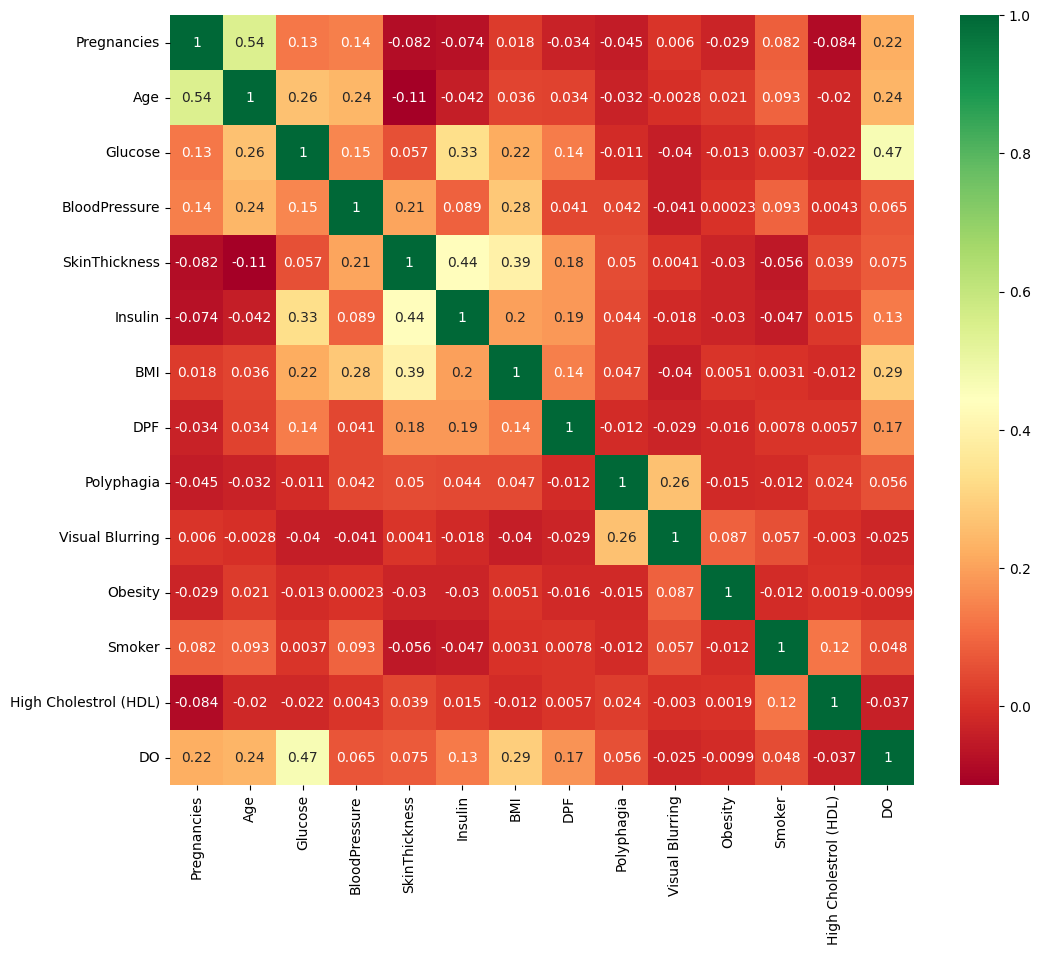

In [7]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [8]:
df_copy = df.copy()
y = df_copy.DO
X = df_copy.drop('DO', axis=1)
y = df_copy['DO']
X.head()

,Pregnancies,Age,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Polyphagia,Visual Blurring,Obesity,Smoker,High Cholestrol (HDL)
0,6,50,148,72,35,0,33.6,0.627,0,0,1,1,1
1,1,31,85,66,29,0,26.6,0.351,0,1,0,1,0
2,8,32,183,64,0,0,23.3,0.672,1,0,0,0,1
3,1,21,89,66,23,94,28.1,0.167,1,0,0,0,0
4,0,33,137,40,35,168,43.1,2.288,1,1,1,0,1


# **Random forest model**

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

In [10]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [11]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [26]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.9090909090909091


In [ ]:
filename = 'rfc-type1.pkl'
pickle.dump(rfc,open(filename,'wb'))
print("Successfull")

Successfull


# **LGBM Model**

In [32]:
 import lightgbm as ltb
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
 model = ltb.LGBMClassifier()
 model.fit(X_train, y_train)
 print(); print(model)
    
 expected_y  = y_test
 predicted_y = model.predict(X_test)


LGBMClassifier()


In [33]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))


              precision    recall  f1-score   support

           0       0.78      0.83      0.81       149
           1       0.65      0.57      0.61        82

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.73      0.74      0.74       231

[[124  25]
 [ 35  47]]


# **DECISION TREE**

In [34]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7186147186147186


# **Support Vector Machine (SVM)**

In [36]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [38]:
svc_pred = svc_model.predict(X_test)
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7705627705627706
